d:\git\capstone_ipt\venv\Lib\site-packages\matplotlib\colors.py:778: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


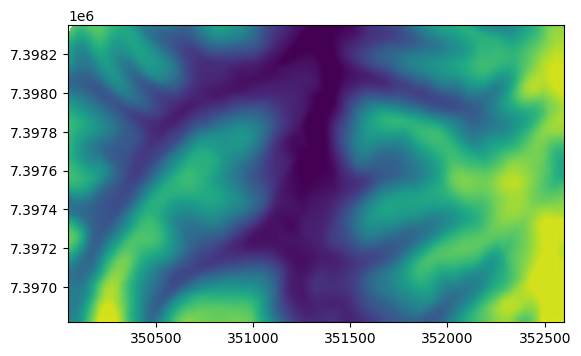

In [2]:
import rasterio
from rasterio.plot import show
fp = "../output/anadem_u_net.tif"
with rasterio.open(fp) as src:
    show(src)

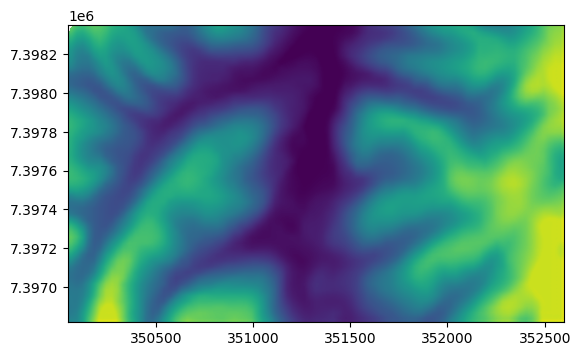

In [3]:
import rasterio
from rasterio.plot import show
fp = "../output/anadem_u_net2.tif"
with rasterio.open(fp) as src:
    show(src)

In [5]:
fp = "../saopaulo_menos_teste.tif"
with rasterio.open(fp) as src:
    show(src)

MemoryError: Unable to allocate 51.2 GiB for an array with shape (1, 145065, 94696) and data type float32

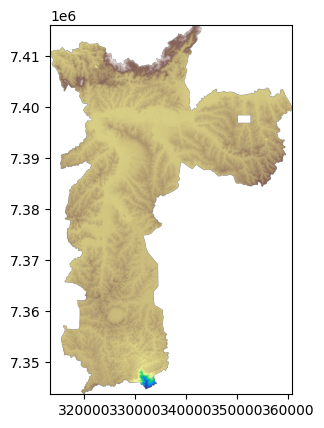

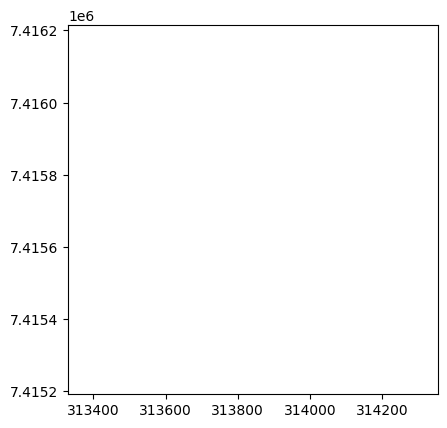

In [7]:
import rasterio
from rasterio.plot import show
from rasterio.enums import Resampling
from rasterio.transform import Affine
from rasterio.windows import Window

fp = "../saopaulo_menos_teste.tif"

# Opção A — ler uma versão reduzida (overview) para visualização (baixa memória)
with rasterio.open(fp) as src:
    scale = 32  # ajuste (8,16,32...) conforme memória/disponibilidade
    out_shape = (1, int(src.height / scale), int(src.width / scale))
    data = src.read(1, out_shape=out_shape, resampling=Resampling.average)
    scale_x = src.width / data.shape[1]
    scale_y = src.height / data.shape[0]
    new_transform = src.transform * Affine.scale(scale_x, scale_y)
    show(data, transform=new_transform, cmap="terrain")

# Opção B — ler apenas uma janela (região) específica
with rasterio.open(fp) as src:
    win = Window(0, 0, 2048, 2048)  # (col_off, row_off, width, height) — ajuste conforme necessário
    data = src.read(1, window=win)
    transform = src.window_transform(win)
    show(data, transform=transform, cmap="terrain")